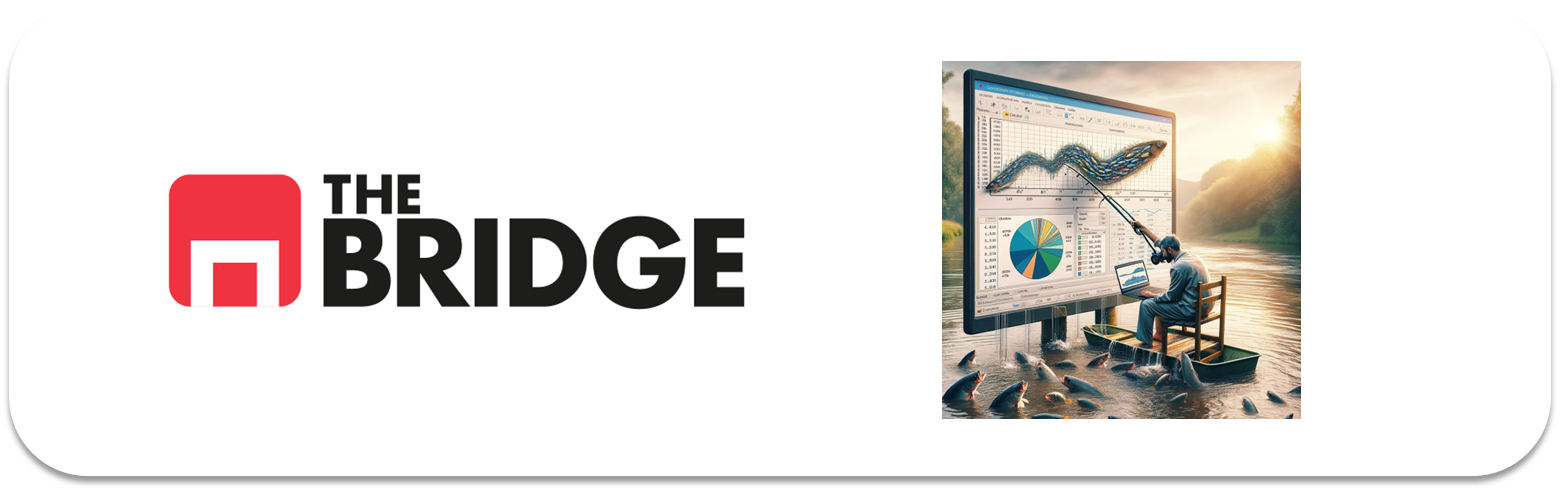

## Machine Learning: CLASE DE REFUERZO

Después de mucho presumir sobre tus capacidades de DS, unas amigas que quieren viajar a USA y quedarse un semestre allí quieren que las ayudes a saber si los precios de los alquileres que les ofrecen están por encima o por debajo de mercado y así poder decidir si negocian a la baja o se van a por la ganga.  

Quieres impresionarlas por diversos motivos (una de ellas es la mujer de tu vida, o bien es tu jefa, o bien es la mejor amiga que has tenido o bien es la person a la que más aborreces y quieres dejarla impresionada y cerrarle la boca o lo que prefieras...) por eso pides ayuda a tu antiguo Lead Instructor. Y este en una escueta respuesta a tu mail te manda un archivo de datos adjunto y este mensaje:

"El que quiere peces, que se moje el culo"

El dataset lo tienes en "data/peces_culo.csv", y tú por tu lado aportas "data/alquileres_amigas.xlsx" con los datos de los alquileres que están manejando ellas.

Pues ya sabes... 

In [9]:
import tensorflow as tf

# Configurar la GPU antes de inicializar TensorFlow
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_extraction.text import CountVectorizer


In [5]:
df_culo=pd.read_csv(r"D:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\SPRING_17_M_L_WRAP_UP\REFUERZO\data\peces_culo.csv")
df_amigas=pd.read_excel(r"D:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\SPRING_17_M_L_WRAP_UP\REFUERZO\data\alquileres_amigas.xlsx")

In [14]:
df_culo.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,...,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,...,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,...,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,...,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401


In [18]:
df_culo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9996 entries, 0 to 9995
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9996 non-null   int64  
 1   category       9996 non-null   object 
 2   title          9996 non-null   object 
 3   body           9996 non-null   object 
 4   amenities      6450 non-null   object 
 5   bathrooms      9962 non-null   float64
 6   bedrooms       9989 non-null   float64
 7   currency       9996 non-null   object 
 8   fee            9996 non-null   object 
 9   has_photo      9996 non-null   object 
 10  pets_allowed   5834 non-null   object 
 11  price          9996 non-null   int64  
 12  price_display  9996 non-null   object 
 13  price_type     9996 non-null   object 
 14  square_feet    9996 non-null   int64  
 15  address        6669 non-null   object 
 16  cityname       9919 non-null   object 
 17  state          9919 non-null   object 
 18  latitude

In [24]:
exclude_columns=[col for col in df_culo.columns if col not in df_amigas.columns]

In [25]:
df_culo.category.value_counts(dropna=False)

housing/rent/apartment     9992
housing/rent/home             2
housing/rent/short_term       2
Name: category, dtype: int64

In [30]:
exclude_columns.append(df_culo.category)

In [28]:
df_culo.title.value_counts()

Apartment in great location                           40
Super Cute! Apartment for Rent!                       32
Apartment in prime location                           31
This Apartment is a must see!                         27
Apartment in quiet area, spacious with big kitchen    26
                                                      ..
One BR 218 South Walnut                                1
One BR 5505 Bonner Ave.,                               1
One BR 21200 Kittridge St                              1
One BR 807 WEST LYNN                                   1
Beautiful Lawrenceville Apartment for rent             1
Name: title, Length: 9346, dtype: int64

In [32]:
exclude_columns.append(df_culo.title)

In [38]:
df_culo.amenities.value_counts().nlargest(10)

Parking                            229
Dishwasher,Refrigerator            225
Pool                               171
Dishwasher,Parking,Pool            149
Dishwasher                         147
Dishwasher,Parking,Refrigerator     94
Parking,Pool                        93
Refrigerator                        85
Parking,Storage                     68
Parking,Refrigerator                67
Name: amenities, dtype: int64

In [36]:
df_amigas.amenities.value_counts()

AC,Dishwasher,Elevator,Gated,Gym,Parking,Washer Dryer,Wood Floors    1
Name: amenities, dtype: int64

In [ ]:
#vectorizamos amenities ya que esta en los dos

In [ ]:
df_amigas

In [39]:
lista_1= df_amigas.amenities.to_list()

In [40]:
lista_1

[nan,
 'AC,Dishwasher,Elevator,Gated,Gym,Parking,Washer Dryer,Wood Floors',
 nan,
 nan]

In [ ]:
vocabulary=[amenity.lower]

In [ ]:
contador= CountVectorizer(vocanulary=lista_1)



In [31]:
df_culo.body

0       This unit is located at second St NE, Uhland T...
1       This unit is located at 814 Schutte Road, Evan...
2       This unit is located at N Scott St, 14th St N,...
3       This unit is located at 1717 12th Ave, Seattle...
4       This unit is located at Washington Blvd, N Cle...
                              ...                        
9991    This unit is located at 5407 Abbott Place - Ab...
9992    This unit is located at 256 Las Entradas, Mont...
9993    This unit is located at 9908 Bentcross Drive, ...
9994    Monthly Rent$4,605 -to $4,790AmenitiesThe Aldy...
9995    Square footage: 880 sq. feet, unit number: 150...
Name: body, Length: 9996, dtype: object

In [33]:
exclude_columns.append(df_culo.body)

In [41]:
df_culo.columns

Index(['id', 'category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price',
       'price_display', 'price_type', 'square_feet', 'address', 'cityname',
       'state', 'latitude', 'longitude', 'source', 'time'],
      dtype='object')

In [44]:
df_amigas.columns

Index(['category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price', 'square_feet',
       'address', 'cityname', 'state', 'latitude', 'longitude', 'source'],
      dtype='object')

In [42]:
df_culo.price_type.value_counts()

Monthly           9994
Weekly               1
Monthly|Weekly       1
Name: price_type, dtype: int64

In [43]:
df_culo.address.value_counts()

908 8th SW St                3
901 Hidden Valley Drive      3
500 Sleepy Hollow Rd         3
7098 Fernwood St             2
1050 Manhattan Boulevard     2
                            ..
2300 Woodland Crossing Dr    1
2050 E 15th Avenue           1
1728 Barton Springs Road     1
1915 Patzman St              1
9908 Bentcross Dr            1
Name: address, Length: 6654, dtype: int64

In [45]:
df_culo.pets_allowed.value_counts()

Cats,Dogs    5225
Cats          485
Dogs          124
Name: pets_allowed, dtype: int64

In [15]:
df_culo.isna().sum()

id                  0
category            0
title               0
body                0
amenities        3546
bathrooms          34
bedrooms            7
currency            0
fee                 0
has_photo           0
pets_allowed     4162
price               0
price_display       0
price_type          0
square_feet         0
address          3327
cityname           77
state              77
latitude           10
longitude          10
source              0
time                0
dtype: int64

In [19]:
df_amigas

,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,square_feet,address,cityname,state,latitude,longitude,source
0,housing/rent/apartment,One BR 1017 S. 31st Street,"This unit is located at 1017 S. 31st Street, O...",NaN,1,1,USD,No,Thumbnail,"Cats,Dogs",950,725,1017 S 31st St,Omaha,NE,41.2562,-96.0404,RentLingo
1,housing/rent/apartment,Two BR 7616 N. Marshfield Avenue,This unit is located at 7616 N. Marshfield Ave...,"AC,Dishwasher,Elevator,Gated,Gym,Parking,Washe...",1,2,USD,No,Thumbnail,"Cats,Dogs",1220,700,7616 N Marshfield Ave,Chicago,IL,41.8625,-87.6825,RentDigs.com
2,housing/rent/apartment,Two BR 4803 Nevada Ave.,"This unit is located at 4803 Nevada Ave., Nash...",NaN,1,2,USD,No,Thumbnail,NaN,1900,1241,4803 Nevada Avenue,Nashville,TN,36.1370,-86.7830,ListedBuy
3,housing/rent/apartment,Studio apartment 4875 N. Magnolia Ave.,"This unit is located at 4875 N. Magnolia Ave.,...",NaN,1,0,USD,No,Thumbnail,"Cats,Dogs",1400,286,4875 N Magnolia Avenue,Chicago,IL,41.8625,-87.6825,RentLingo
